In [1]:
import numpy as numpy
import torch
import pandas as pd
import matplotlib.pyplot as plt
import wfdb 
import numpy as np

In [2]:
base = "E:\\Downloads\\mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0"
rec_path = '/files/p1000/p10001725/s41420867/41420867' 
path = "E:/Downloads/mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0/files/p1000/p10001725/s41420867/41420867" #base+ rec_path

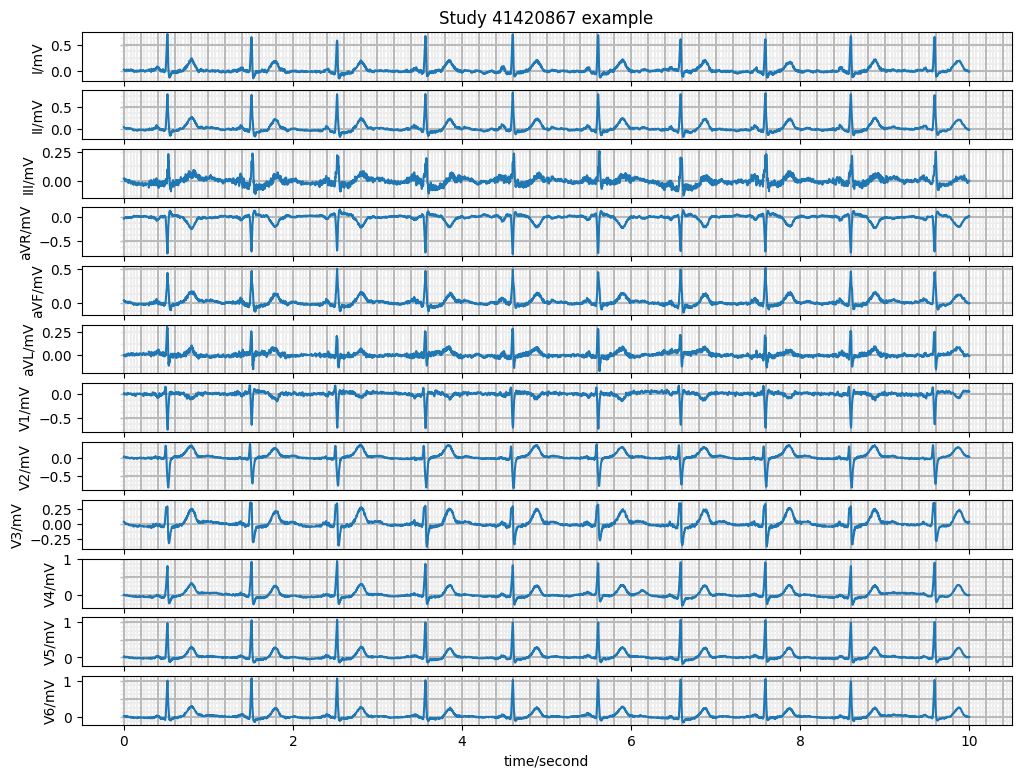

In [3]:
rd_record = wfdb.rdrecord(path) 
wfdb.plot_wfdb(record=rd_record, figsize=(12,9), title='Study 41420867 example', ecg_grids='all')

In [4]:
signal = rd_record.p_signal
print(signal, signal.shape)

[[ 0.025  0.045  0.02  ...  0.01   0.015  0.015]
 [ 0.015  0.035  0.02  ...  0.01   0.025  0.015]
 [ 0.01   0.035  0.025 ...  0.015  0.035  0.015]
 ...
 [-0.015 -0.01   0.005 ...  0.     0.005 -0.005]
 [-0.015 -0.01   0.005 ...  0.     0.005 -0.005]
 [-0.015 -0.015  0.005 ...  0.01   0.015 -0.005]] (5000, 12)


# Iterate over first 1000 records

In [5]:
df = pd.read_csv("E:\\Downloads\\mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0\\record_list.csv")
df

,subject_id,study_id,file_name,ecg_time,path
0,10000032,40689238,40689238,2180-07-23 08:44:00,files/p1000/p10000032/s40689238/40689238
1,10000032,44458630,44458630,2180-07-23 09:54:00,files/p1000/p10000032/s44458630/44458630
2,10000032,49036311,49036311,2180-08-06 09:07:00,files/p1000/p10000032/s49036311/49036311
3,10000117,45090959,45090959,2181-03-04 17:14:00,files/p1000/p10000117/s45090959/45090959
4,10000117,48446569,48446569,2183-09-18 13:52:00,files/p1000/p10000117/s48446569/48446569
...,...,...,...,...,...
800030,19999840,48683947,48683947,2164-09-12 12:28:00,files/p1999/p19999840/s48683947/48683947
800031,19999840,41842293,41842293,2164-09-17 11:31:00,files/p1999/p19999840/s41842293/41842293
800032,19999987,41190887,41190887,2145-11-02 19:54:00,files/p1999/p19999987/s41190887/41190887
800033,19999987,45828463,45828463,2145-11-03 03:00:00,files/p1999/p19999987/s45828463/45828463


In [6]:
base = "E:\\Downloads\\mimic-iv-ecg-diagnostic-electrocardiogram-matched-subset-1.0"
stack = []
start = 10000
end   = 10100
for idx, row in df.iloc[start:end].iterrows():
    if idx % 10 == 0:
        print(idx,end="\r")
    subject_id = row["subject_id"]
    study_id = row["study_id"]
    file_path = row["path"]
    path = (base + "\\"+ file_path.replace("/","\\"))
    rd_record = wfdb.rdrecord(path) 
    signal = rd_record.p_signal.T
    stack.append(signal)

print("==end loop===")
tensor = torch.as_tensor(np.asarray(stack))
print(tensor, tensor.size())

==end loop===
tensor([[[ 0.0000,  0.0000,  0.0000,  ..., -0.0200, -0.0200, -0.0200],
         [ 0.1550,  0.1650,  0.1700,  ...,  0.1150,  0.1150,  0.1150],
         [ 0.1850,  0.1950,  0.2000,  ...,  0.1650,  0.1650,  0.1650],
         ...,
         [-0.1000, -0.1000, -0.1100,  ..., -0.1700, -0.1600, -0.1600],
         [-0.0950, -0.0950, -0.0950,  ..., -0.0950, -0.0950, -0.0950],
         [-0.1000, -0.0950, -0.0950,  ..., -0.0700, -0.0600, -0.0600]],

        [[-0.0100, -0.0100, -0.0100,  ...,  0.1400,  0.1400,  0.1500],
         [-0.0300, -0.0300, -0.0400,  ...,  0.0250,  0.0300,  0.0500],
         [-0.0050, -0.0050, -0.0150,  ..., -0.1000, -0.0950, -0.0850],
         ...,
         [-0.0500, -0.0400, -0.0300,  ..., -0.0300, -0.0400, -0.0500],
         [-0.0400, -0.0400, -0.0350,  ...,  0.0150,  0.0150,  0.0200],
         [-0.0550, -0.0500, -0.0450,  ...,  0.0250,  0.0250,  0.0250]],

        [[-0.0050, -0.0200, -0.0350,  ...,  0.0650,  0.0700,  0.0750],
         [-0.0700, -0.0700, -0.

In [7]:
torch.save(tensor,f'mimic_data_{start}-{end}.pt')

In [8]:
data = torch.load(f'mimic_data_{start}-{end}.pt')
data.shape

torch.Size([100, 12, 5000])

In [9]:
patient1 = data[1]
patient1.shape

torch.Size([12, 5000])

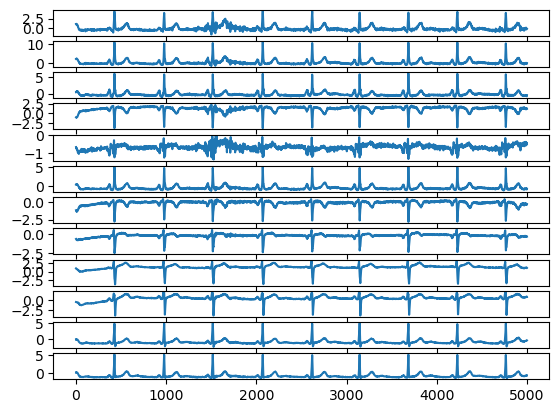

<Figure size 2000x1200 with 0 Axes>

In [17]:
fig, axs = plt.subplots(len(patient1))
plt.figure(figsize=(20,12))

for i,channel in enumerate(patient1):
    axs[i].plot(channel,)

plt.show()